### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("preethamgouda/financial-risk")

print("Downloaded to:", path)

files = os.listdir(path)
print("Files:", files)

csv_files = [f for f in files if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in dataset folder!")

csv_path = os.path.join(path, csv_files[0])
print("Reading:", csv_path)

df = pd.read_csv(csv_path)

df.head(10)


100%|██████████| 693k/693k [00:00<00:00, 27.6MB/s]

Extracting files...
Downloaded to: /root/.cache/kagglehub/datasets/preethamgouda/financial-risk/versions/1
Files: ['financial_risk_assessment.csv']
Reading: /root/.cache/kagglehub/datasets/preethamgouda/financial-risk/versions/1/financial_risk_assessment.csv


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,Male,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


In [ ]:
df = df.drop(columns=["City", "Country", "State"], errors="ignore")

In [ ]:
df.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,Male,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


In [ ]:
df = df.dropna()


In [ ]:
df.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
10,42,Non-binary,Master's,Single,116212.0,707.0,24771.0,Home,Employed,11,Excellent,0.114134,212198.0,3.0,Matthewborough,NH,French Guiana,0.0,2,Medium
16,55,Male,High School,Married,70978.0,706.0,36970.0,Personal,Unemployed,19,Excellent,0.266941,54041.0,3.0,Christophermouth,MO,Tonga,1.0,0,Medium
19,56,Non-binary,PhD,Married,21084.0,702.0,22039.0,Personal,Employed,19,Fair,0.231046,226053.0,2.0,East James,MP,Isle of Man,0.0,2,Medium
27,41,Male,PhD,Married,93133.0,791.0,14052.0,Business,Employed,13,Poor,0.282850,82774.0,0.0,Lewisland,AZ,South Georgia and the South Sandwich Islands,1.0,0,Low
32,48,Non-binary,PhD,Married,46408.0,632.0,48403.0,Personal,Unemployed,16,Excellent,0.185325,93647.0,3.0,South Jason,KS,Guyana,1.0,0,Low
39,47,Female,High School,Single,33065.0,783.0,6895.0,Auto,Self-employed,2,Fair,0.116681,158428.0,3.0,West Sharon,AL,Seychelles,2.0,0,Low
44,21,Male,Bachelor's,Widowed,73952.0,631.0,49525.0,Auto,Unemployed,3,Excellent,0.143644,32912.0,0.0,West Denisebury,KY,French Guiana,1.0,2,Low


In [ ]:
df = df.drop(columns=["Income", "Loan Amount"], errors="ignore")

In [ ]:
df.shape

(5716, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5716 entries, 0 to 14997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5716 non-null   int64  
 1   Gender                 5716 non-null   object 
 2   Education Level        5716 non-null   object 
 3   Marital Status         5716 non-null   object 
 4   Income                 5716 non-null   float64
 5   Credit Score           5716 non-null   float64
 6   Loan Amount            5716 non-null   float64
 7   Loan Purpose           5716 non-null   object 
 8   Employment Status      5716 non-null   object 
 9   Years at Current Job   5716 non-null   int64  
 10  Payment History        5716 non-null   object 
 11  Debt-to-Income Ratio   5716 non-null   float64
 12  Assets Value           5716 non-null   float64
 13  Number of Dependents   5716 non-null   float64
 14  Previous Defaults      5716 non-null   float64
 15  Marital 

In [ ]:
# Summary statistics for numerical columns
df.describe(include=[np.number])


,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.000000,5716.0000,5716.000000,5716.000000
mean,43.581700,70190.358467,699.128062,27577.067880,9.432120,0.351541,160244.610217,2.0014,2.003324,0.987929
std,14.755688,29149.358714,56.860099,12970.758807,5.791336,0.143394,80588.634163,1.4194,1.428184,0.811355
min,18.000000,20014.000000,600.000000,5001.000000,0.000000,0.100135,20104.000000,0.0000,0.000000,0.000000
25%,31.000000,44492.750000,650.000000,16574.500000,4.000000,0.226891,90832.500000,1.0000,1.000000,0.000000
50%,43.000000,70443.000000,700.000000,27626.000000,9.000000,0.352976,160643.000000,2.0000,2.000000,1.000000
75%,56.000000,96003.750000,748.000000,38759.500000,15.000000,0.476168,229234.750000,3.0000,3.000000,2.000000
max,69.000000,119978.000000,799.000000,49978.000000,19.000000,0.599970,299999.000000,4.0000,4.000000,2.000000


In [ ]:
df.describe(include=[object])


,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,Risk Rating
count,5716,5716,5716,5716,5716,5716,5716
unique,3,4,4,4,3,4,3
top,Female,Bachelor's,Widowed,Business,Self-employed,Good,Low
freq,1948,1449,1482,1471,1912,1458,3424


In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,0
Credit Score,0
Loan Amount,0
Loan Purpose,0
Employment Status,0
Years at Current Job,0


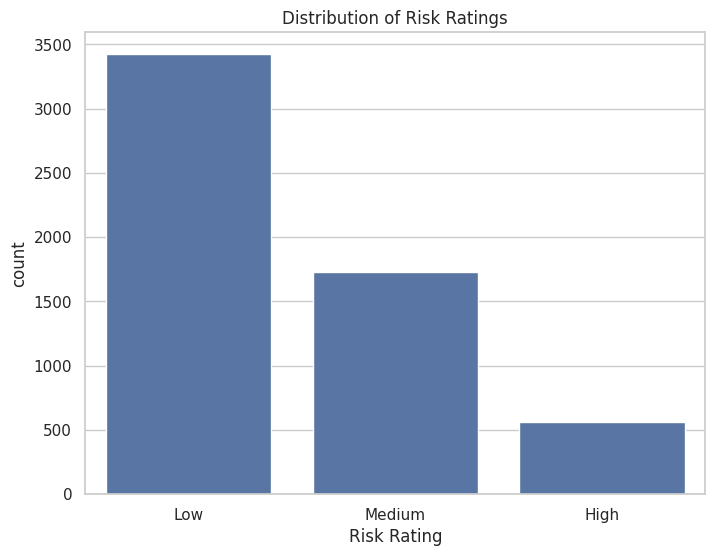

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Ratings')
plt.show()

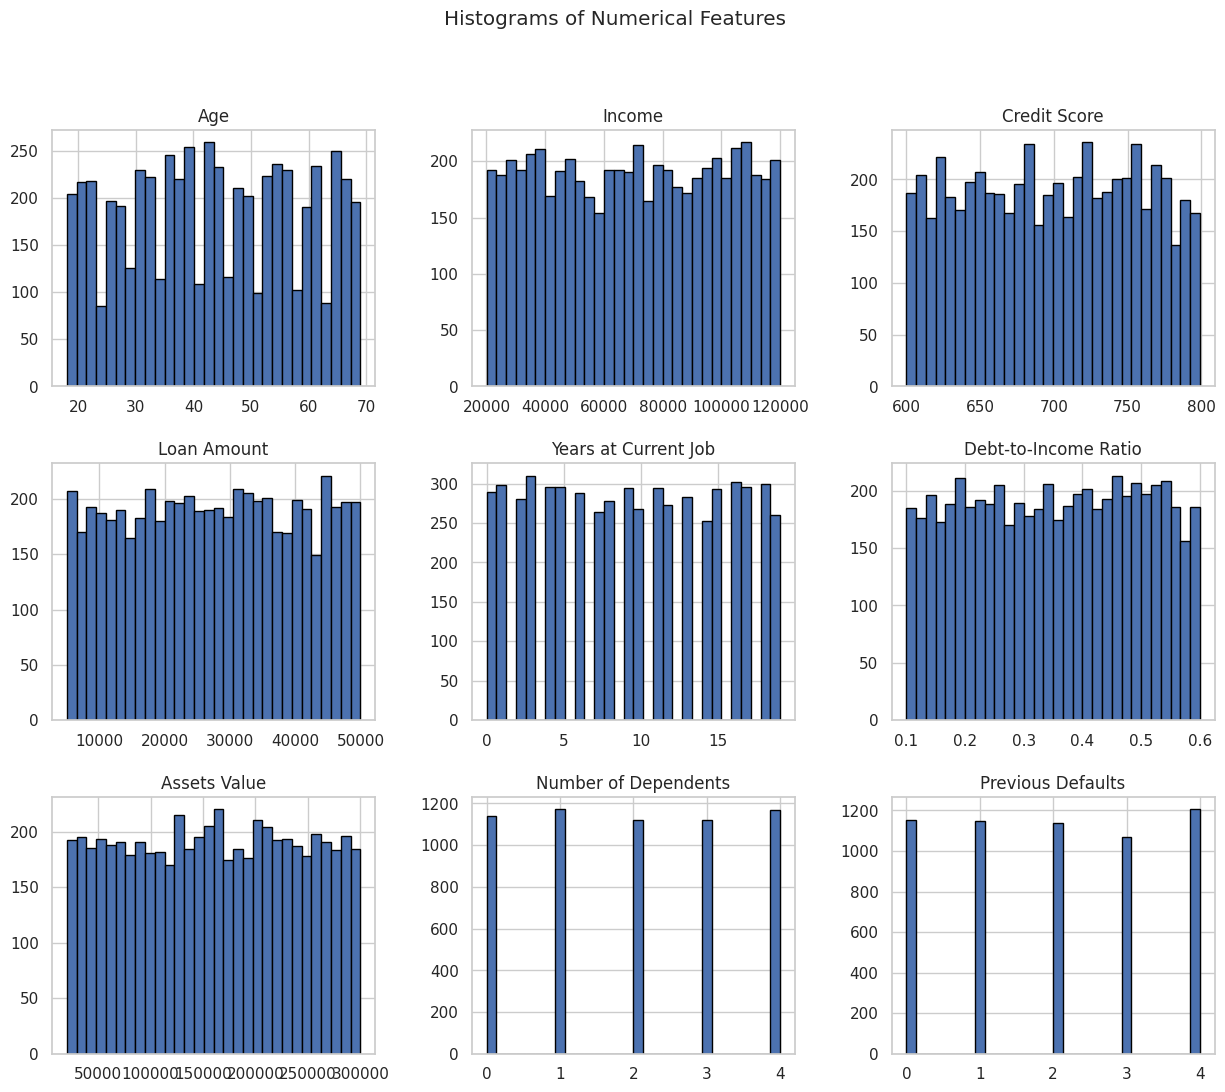

In [ ]:
num_features = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
                 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults']
df[num_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

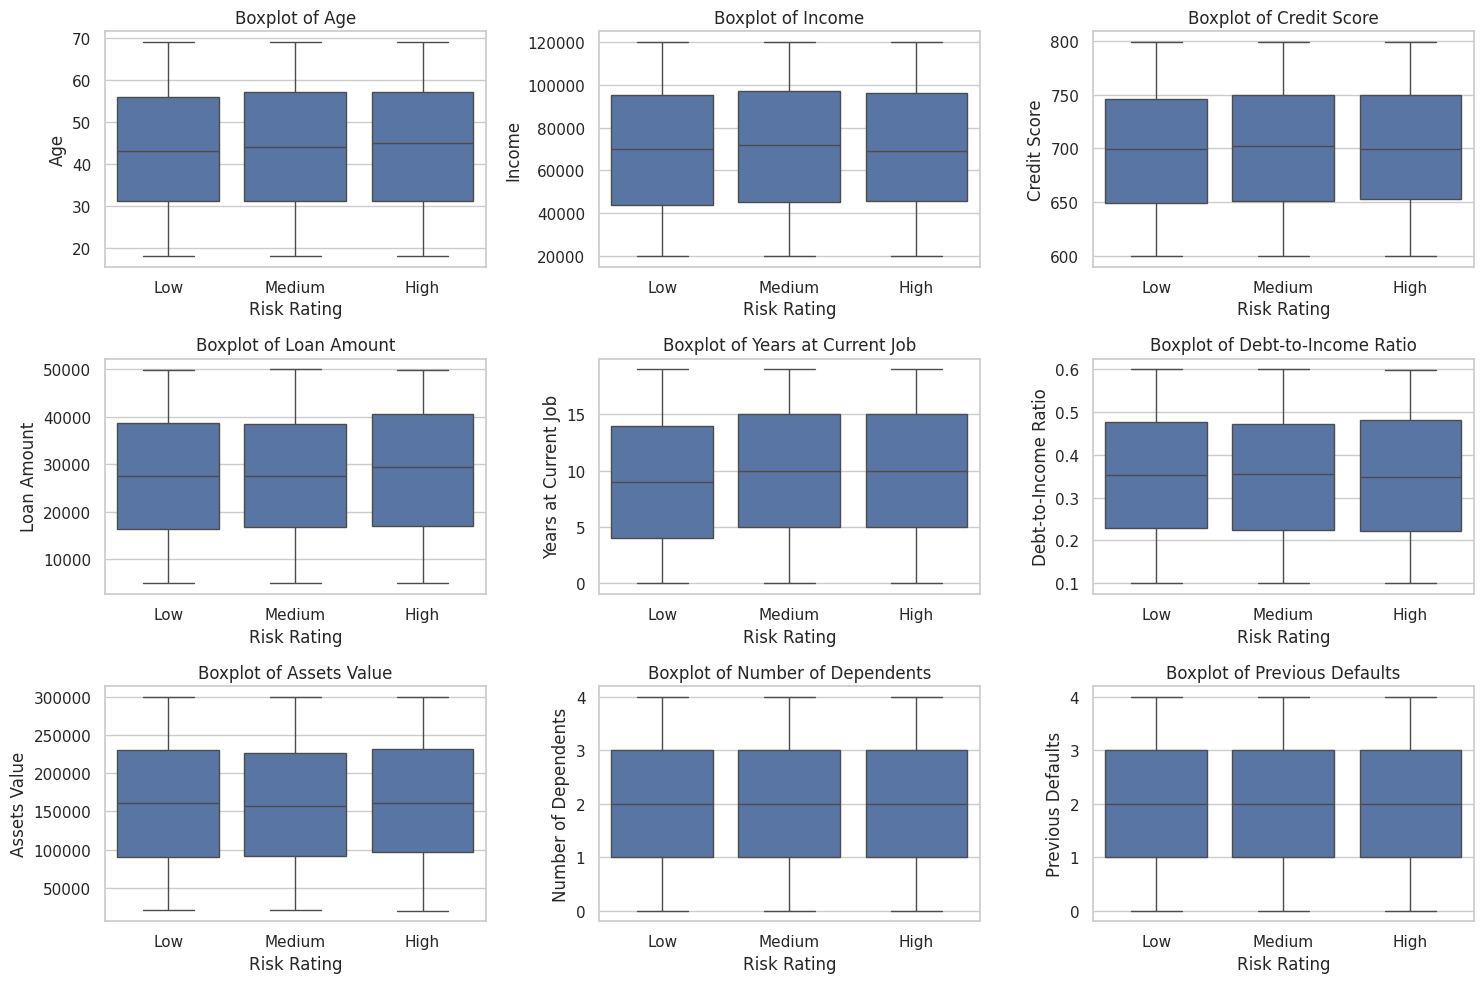

In [ ]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Risk Rating', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

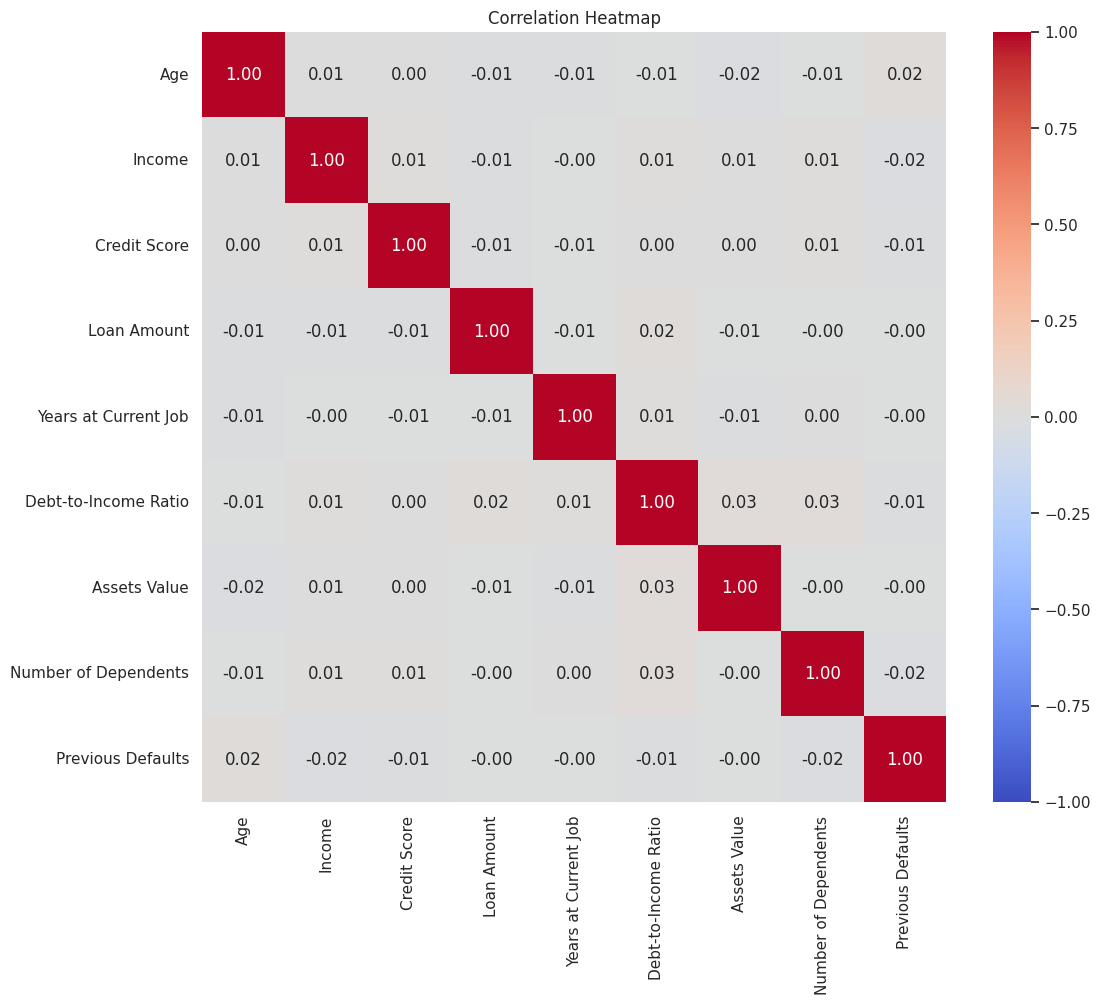

In [ ]:
plt.figure(figsize=(12,10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
for column in ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status',
                'Payment History']:
    print(f'{column} unique values:')
    print(df[column].value_counts())
    print()

Gender unique values:
Gender
Female        1948
Non-binary    1916
Male          1852
Name: count, dtype: int64

Education Level unique values:
Education Level
Bachelor's     1449
High School    1439
Master's       1420
PhD            1408
Name: count, dtype: int64

Marital Status unique values:
Marital Status
Widowed     1482
Divorced    1444
Single      1412
Married     1378
Name: count, dtype: int64

Loan Purpose unique values:
Loan Purpose
Business    1471
Personal    1438
Home        1418
Auto        1389
Name: count, dtype: int64

Employment Status unique values:
Employment Status
Self-employed    1912
Employed         1910
Unemployed       1894
Name: count, dtype: int64

Payment History unique values:
Payment History
Good         1458
Excellent    1440
Fair         1433
Poor         1385
Name: count, dtype: int64



In [ ]:
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

numeric_features = ['Age', 'Credit Score', 'Years at Current Job',
                     'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change']
categorical_features = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status',
                         'Payment History']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Credit Score',
                                                   'Years at Current Job',
                                                   'Debt-to-Income Ratio',
                                                   'Assets Value',
                                                   'Number of Dependents',
                                                   'Previous Defaults',
                                                   'Marital Status Change']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Marital Status',
                                                   'Loan Purpose',
                                                   'Employment Status',
                                                   'Payment History'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       103
         Low       0.61      0.96      0.75       706
      Medium       0.25      0.03      0.05       335

    accuracy                           0.60      1144
   macro avg       0.29      0.33      0.27      1144
weighted avg       0.45      0.60      0.48      1144



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


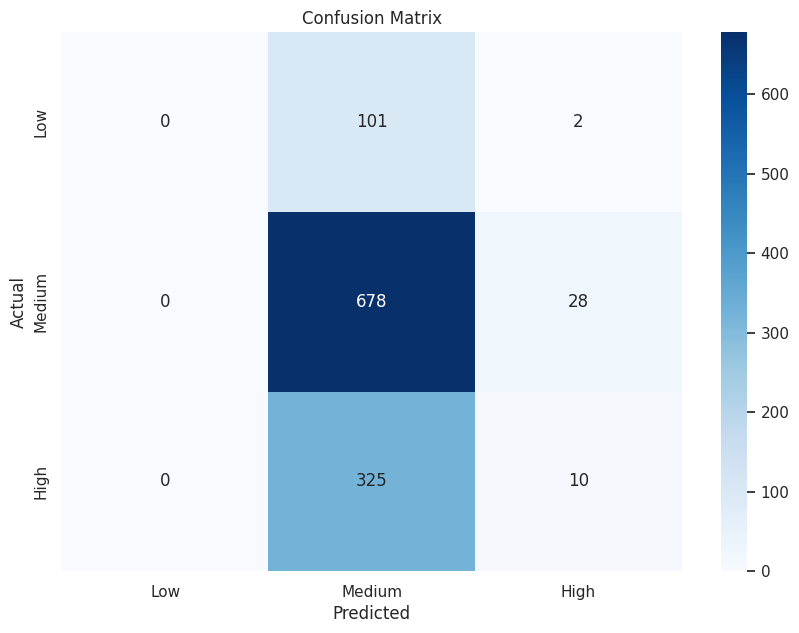

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

onf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()